In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
30,449 cases (7 day average) as of Mon 12 Jul, +1,466.0 since Sun 11 Jul
536 hospitalised (7 day average) as of Wed 14 Jul, +0.0 since Wed 14 Jul
26 died (7 day average) as of Mon 12 Jul, +1.1 since Sun 11 Jul


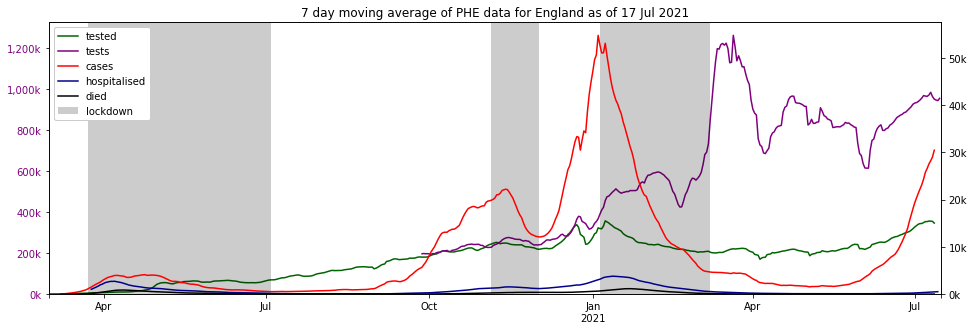

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

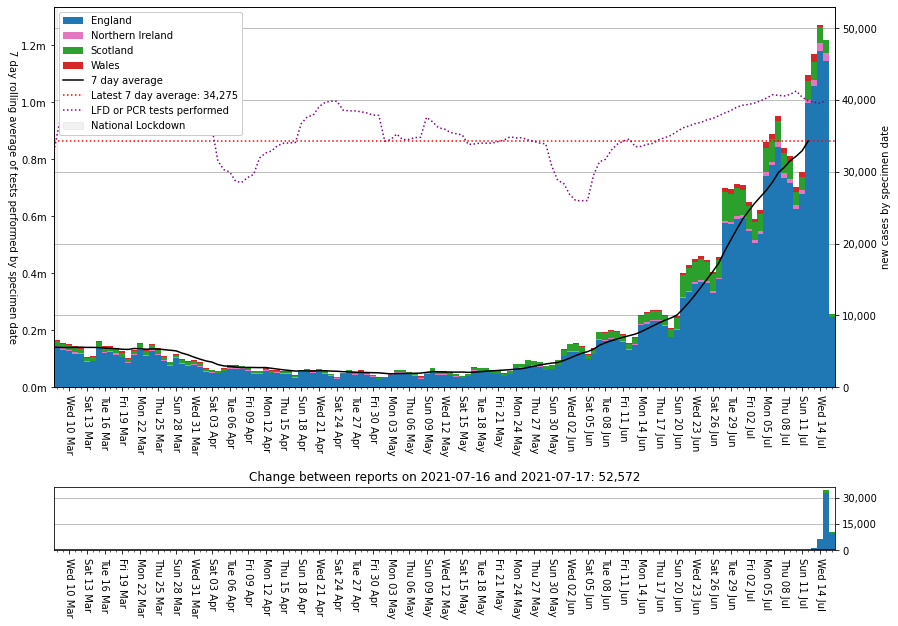

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

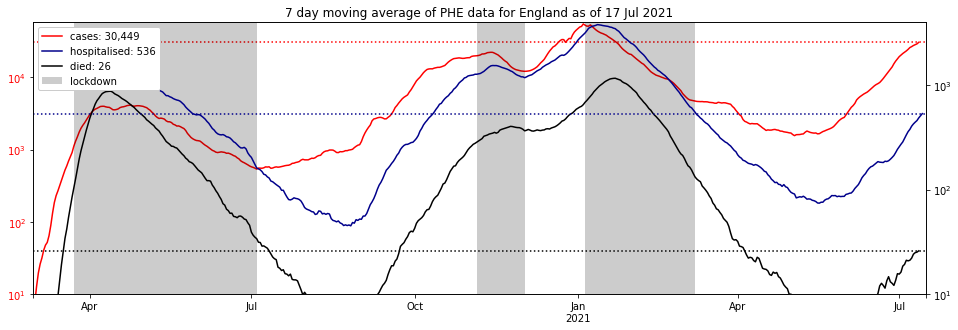

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

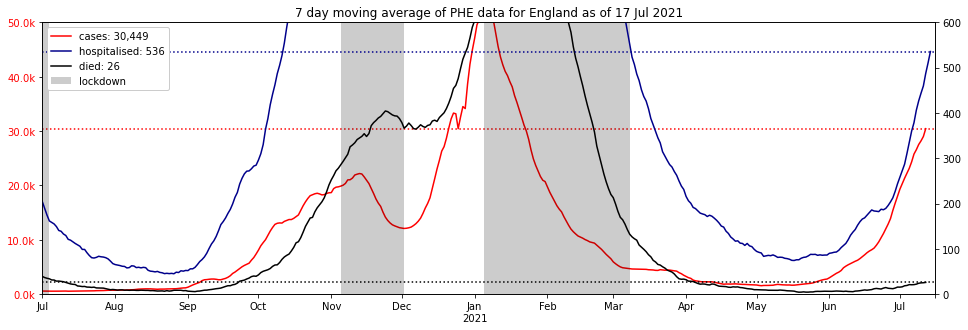

In [19]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=600)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,16 Jul 21,"+29,911,441","+38,776,888","+29,911,441","+163,936","+50,247","+163,936"
Northern Ireland,16 Jul 21,"+973,998","+1,201,048","+973,998","+10,466","+11,185","+10,466"
Scotland,16 Jul 21,"+2,954,776","+3,970,026","+2,954,776","+14,574","+6,524","+14,574"
Wales,16 Jul 21,"+1,892,082","+2,279,139","+1,892,082",+0,+0,+0


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,29911441.0,38776888.0,8865447.0,56286961,53.140977,15.750445,31.108578
1,Northern Ireland,N92000002,973998.0,1201048.0,227050.0,1893667,51.434492,11.989964,36.575544
2,Scotland,S92000003,2954776.0,3970026.0,1015250.0,5463300,54.084088,18.583091,27.332821
3,Wales,W92000004,1892082.0,2279139.0,387057.0,3152879,60.011247,12.276304,27.712449


'partial: 46,227,101 (69.2%), full: 35,732,297'

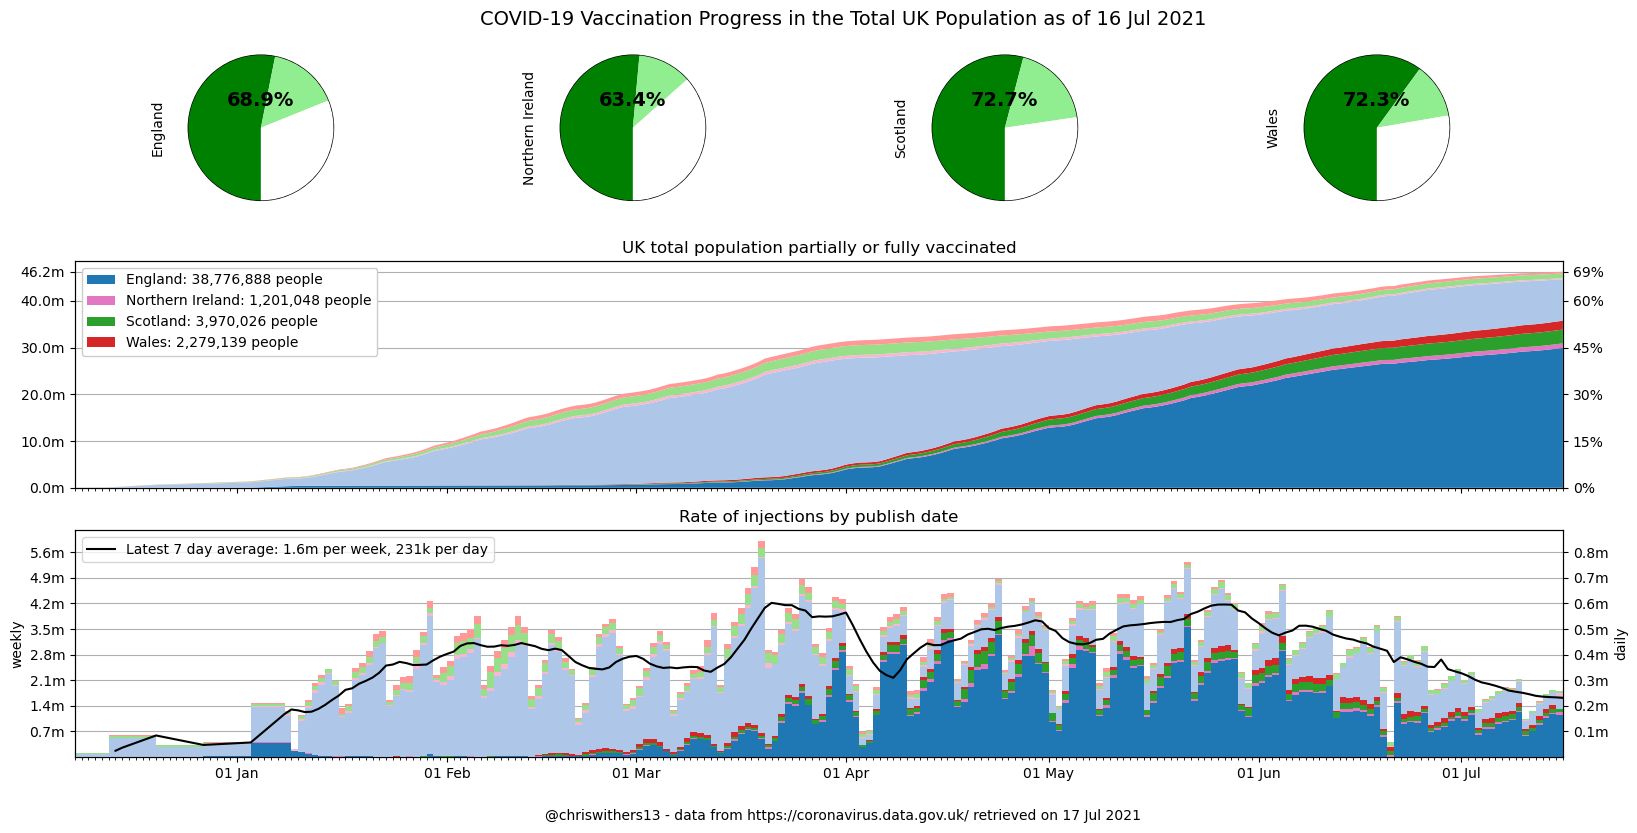

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

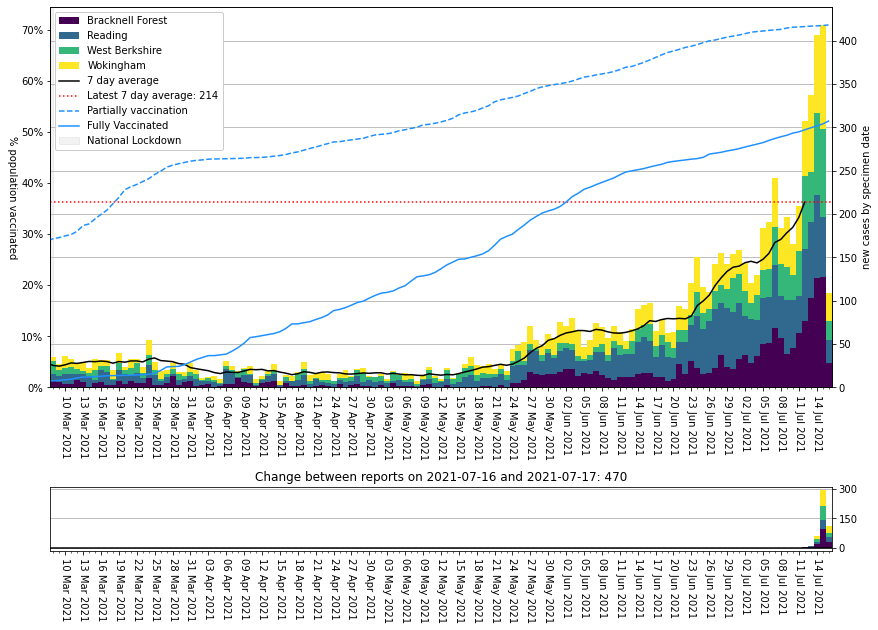

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

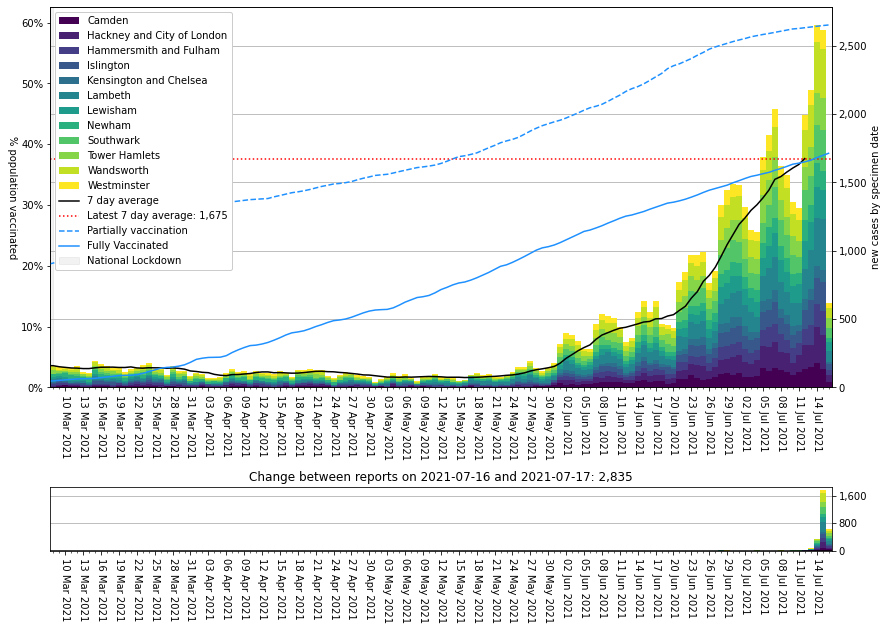

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000003,Redcar and Cleveland,1286.183011,1764.0,2021-07-16
E06000002,Middlesbrough,1145.552561,1615.0,2021-07-16
E08000023,South Tyneside,1033.276812,1560.0,2021-07-16
E06000004,Stockton-on-Tees,963.779719,1902.0,2021-07-16
E08000024,Sunderland,940.926523,2613.0,2021-07-16
E06000001,Hartlepool,939.538558,880.0,2021-07-16
E07000029,Copeland,890.251236,607.0,2021-07-16
E06000012,North East Lincolnshire,871.755984,1391.0,2021-07-16
E08000037,Gateshead,832.941526,1683.0,2021-07-16


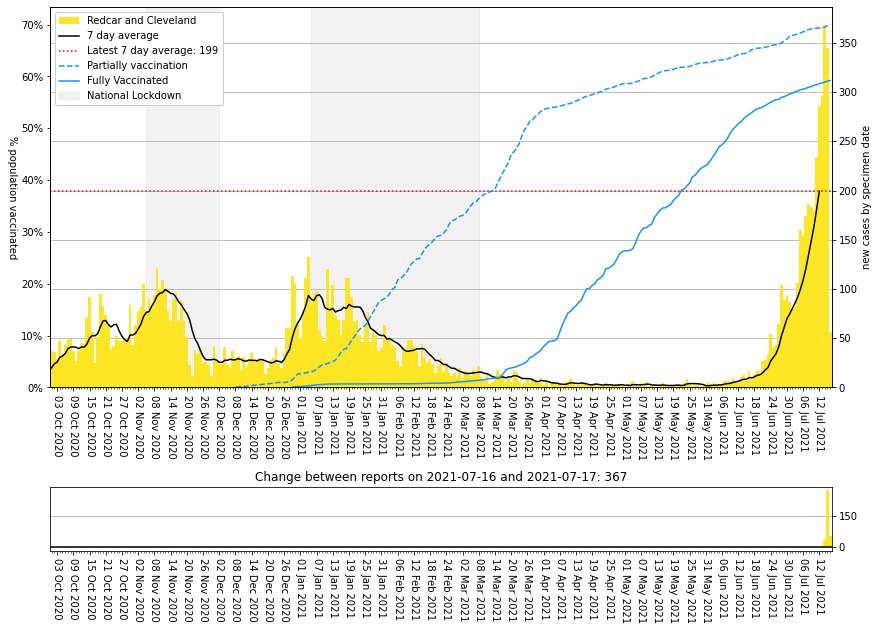

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,454.188766,5186.0,2021-07-16
E08000035,Leeds,559.548831,4438.0,2021-07-16
E06000047,County Durham,713.647014,3783.0,2021-07-16
E06000023,"Bristol, City of",645.694542,2992.0,2021-07-16
E08000019,Sheffield,468.322809,2739.0,2021-07-16
E08000032,Bradford,502.060114,2710.0,2021-07-16
E08000003,Manchester,483.306744,2672.0,2021-07-16
E08000024,Sunderland,940.926523,2613.0,2021-07-16
E08000021,Newcastle upon Tyne,753.913216,2283.0,2021-07-16


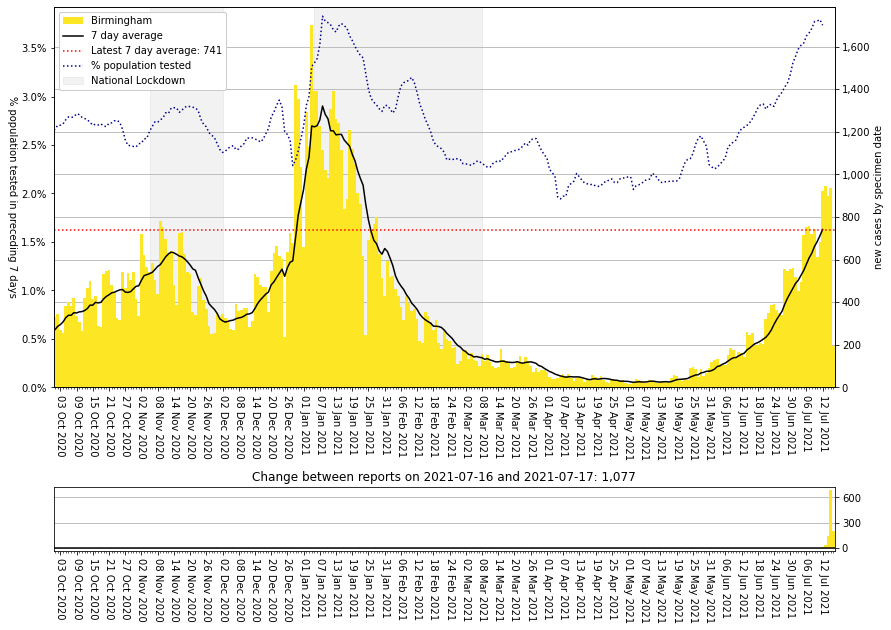

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

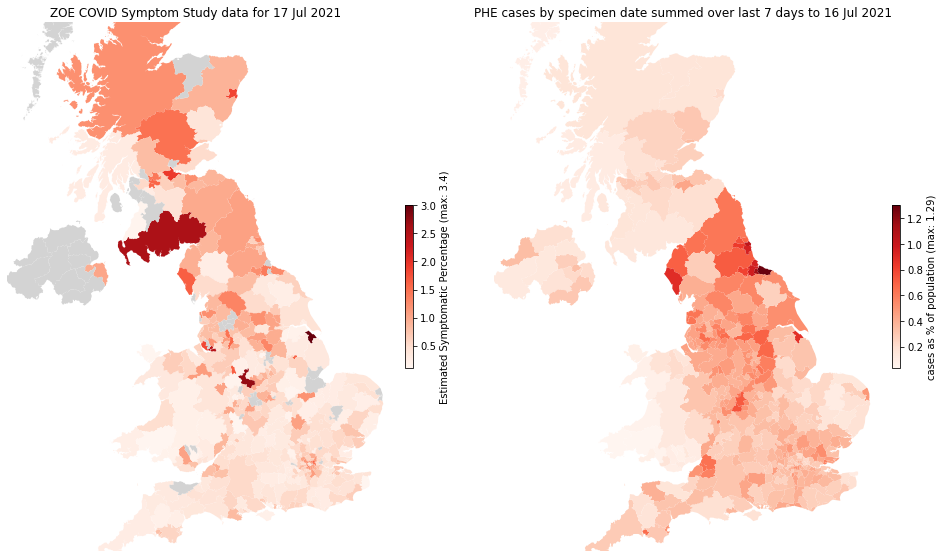

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...